In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset
O primeiro dataset foi pesquisado para o tema de Alzheimer, podendo ser encontrado no link https://ctdbase.org/detail.go?type=disease&acc=MESH%3AD000544&view=expConsol, foi observado que nesse dataset não teria dados o suficiente para a doença, visto que somente 11 pessoas do total teriam realmente, deixando a pesquisa e a analise com um bias.
As caracteristicas desse dataset inicialmente era bem interessante, pois mostravas alguns dados de país, receptores da doença, tipos de estressor, sua relação com alguns eventos de exposição, mas devido a sua baixa quantidade de dados não poderia ser utilizado.

In [2]:
df = pd.read_csv("CTD_MESHD000544_exposure_20230520230729.csv")

In [9]:
df.columns

Index(['Reference', 'Stressor Source Category', 'Exposure Stressor',
       'Stressor Source Details', 'Stressor Notes', 'Number of Receptors',
       'Receptors', 'Receptor Notes', 'Age', 'Sex', 'Race', 'Methods',
       'LOD/LOQ', 'Detection Frequency (%)', 'Medium', 'Exposure Marker',
       'Marker Level', 'Measurement Statistic', 'Assay Notes', 'Country',
       'State or Province', 'City, Town, Region or Area',
       'Outcome Relationship', 'Disease'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reference                   97 non-null     int64  
 1   Stressor Source Category    97 non-null     object 
 2   Exposure Stressor           97 non-null     object 
 3   Stressor Source Details     35 non-null     object 
 4   Stressor Notes              10 non-null     object 
 5   Number of Receptors         97 non-null     object 
 6   Receptors                   97 non-null     object 
 7   Receptor Notes              61 non-null     object 
 8   Age                         89 non-null     object 
 9   Sex                         89 non-null     object 
 10  Race                        36 non-null     object 
 11  Methods                     89 non-null     object 
 12  LOD/LOQ                     56 non-null     object 
 13  Detection Frequency (%)     8 non-nul

In [4]:
df

,Reference,Stressor Source Category,Exposure Stressor,Stressor Source Details,Number of Stressor Samples,Stressor Notes,Number of Receptors,Receptors,Receptor Notes,Smoking Status,...,Marker Level,Measurement Statistic,Assay Notes,Country,State or Province,"City, Town, Region or Area",Exposure Event Notes,Outcome Relationship,Disease,Phenotype
0,19064650,Dietary|Environmental,Aluminum,NaN,NaN,NaN,"4,177",Study subjects,NaN,NaN,...,NaN,NaN,NaN,France,NaN,NaN,NaN,positive correlation,Alzheimer Disease,NaN
1,15355492,Environmental,beta-N-methylamino-L-alanine,NaN,NaN,NaN,2,Subjects with disease:Alzheimer Disease,Canadian comparison who died of progressive ne...,NaN,...,6.55 micrograms per gram,mean,free BMAA form,Canada,NaN,NaN,NaN,NaN,NaN,NaN
2,15355492,Environmental,beta-N-methylamino-L-alanine,NaN,NaN,NaN,2,Subjects with disease:Alzheimer Disease,Canadian comparison who died of progressive ne...,NaN,...,3.4 micrograms per gram,minimum,free BMAA form,Canada,NaN,NaN,NaN,NaN,NaN,NaN
3,15355492,Environmental,beta-N-methylamino-L-alanine,NaN,NaN,NaN,2,Subjects with disease:Alzheimer Disease,Canadian comparison who died of progressive ne...,NaN,...,9.7 micrograms per gram,maximum,free BMAA form,Canada,NaN,NaN,NaN,NaN,NaN,NaN
4,15355492,Environmental,beta-N-methylamino-L-alanine,NaN,NaN,NaN,2,Subjects with disease:Alzheimer Disease,Canadian comparison who died of progressive ne...,NaN,...,242 micrograms per gram,mean,protein BMAA form,Canada,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,31964412,Environmental,Soot,air pollution,NaN,NaN,"1,227",Subjects with disease:Alzheimer Disease,NaN,NaN,...,1.2 micrograms per cubic meter,interquartile range,NaN,Canada,British Columbia,Vancouver,NaN,NaN,NaN,NaN
93,31964412,Environmental,Soot,air pollution,NaN,NaN,"12,271",Controls for disease:Alzheimer Disease,NaN,NaN,...,0 micrograms per cubic meter,minimum,NaN,Canada,British Columbia,Vancouver,NaN,NaN,NaN,NaN
94,31964412,Environmental,Soot,air pollution,NaN,NaN,"12,271",Controls for disease:Alzheimer Disease,NaN,NaN,...,1 micrograms per cubic meter,median,NaN,Canada,British Columbia,Vancouver,NaN,NaN,NaN,NaN
95,31964412,Environmental,Soot,air pollution,NaN,NaN,"12,271",Controls for disease:Alzheimer Disease,NaN,NaN,...,5 micrograms per cubic meter,maximum,NaN,Canada,British Columbia,Vancouver,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Reference                      0
Stressor Source Category       0
Exposure Stressor              0
Stressor Source Details       62
Number of Stressor Samples    97
Stressor Notes                87
Number of Receptors            0
Receptors                      0
Receptor Notes                36
Smoking Status                95
Age                            8
Sex                            8
Race                          61
Methods                        8
LOD/LOQ                       41
Detection Frequency (%)       89
Medium                         6
Exposure Marker                6
Marker Level                   7
Measurement Statistic          7
Assay Notes                   87
Country                        0
State or Province             64
City, Town, Region or Area    63
Exposure Event Notes          97
Outcome Relationship          86
Disease                       86
Phenotype                     97
dtype: int64

In [6]:
df = df.drop(['Phenotype', 'Exposure Event Notes', 'Number of Stressor Samples', 'Smoking Status'], axis = 1)

In [7]:
df['Disease'].unique()

array(['Alzheimer Disease', nan], dtype=object)

In [15]:
df['Disease'].fillna(0, inplace=True)

In [16]:
df['Disease'].value_counts()

0                    86
Alzheimer Disease    11
Name: Disease, dtype: int64

In [17]:
count = df['Disease'].value_counts()

In [18]:
count

0                    86
Alzheimer Disease    11
Name: Disease, dtype: int64

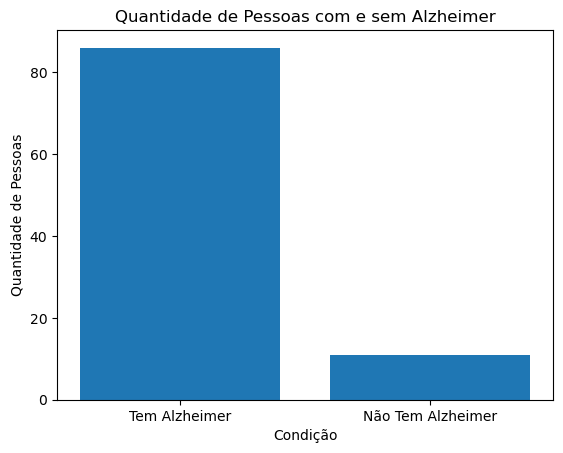

In [20]:
# Plotar o gráfico de barras
plt.bar(['Tem Alzheimer', 'Não Tem Alzheimer'], count)
plt.xlabel('Condição')
plt.ylabel('Quantidade de Pessoas')
plt.title('Quantidade de Pessoas com e sem Alzheimer')
plt.show()

In [23]:
idade = df['Age'].value_counts()
idade

45-84 years (range)    32
78 years (average)     24
88 years (average)     24
82 years (mean)         2
85.7 years (mean)       2
60-89 years (range)     1
55-85 years (range)     1
75.6 years (mean)       1
70.2 years (mean)       1
74.1 years (mean)       1
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age'>

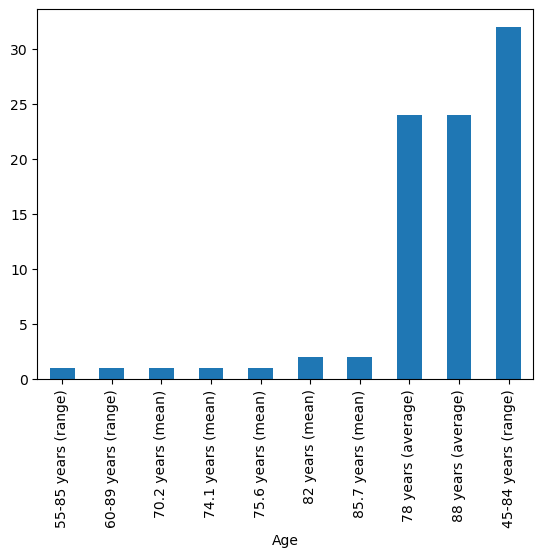

In [37]:
df.groupby(['Age']).Age.count().sort_values().plot(kind='bar')